# Exploration <a id="title"></a>
Here we perform some basic exploration of the wikibooks dataset in order to get basic insights and get some ideas on how to
process the data for training the model.

## Contents
- [Data Loading](#data-loading)
- [Text Exploration](#text-exploration)

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

## Data Loading <a id="data-loading"></a>

In [2]:
fr_file = os.path.join("..", "data", "raw-data", "french-wikibooks", "fr-books-dataset.csv")
df_fr = pd.read_csv(fr_file)

print(df_fr.shape)
print(df_fr.columns)

df_fr.head()

(19080, 5)
Index(['title', 'url', 'abstract', 'body_text', 'body_html'], dtype='object')


,title,url,abstract,body_text,body_html
0,Wikilivres : Photographie/Personnalités/B/Joha...,https://fr.wikibooks.org/wiki/Photographie/Per...,Johan Emilius Bøgh était un photographe danois...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4..."
1,Wikilivres : Photographie/Sociétés et Organisa...,https://fr.wikibooks.org/wiki/Photographie/Soc...,Hugerot-Gallimard était un éditeur de cartes f...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4..."
2,Wikilivres : Pouvoir Accéder et Utiliser Write...,https://fr.wikibooks.org/wiki/Pouvoir_Acc%C3%A...,== Ouvrir la fenêtre d'aide de Writer ==,Pouvoir Accéder et Utiliser Writer\n\n\nBienve...,"<div class=""mw-parser-output""><p><br>\n</p>\n<..."
3,Wikilivres : Climat et écocitoyens/Plantons le...,https://fr.wikibooks.org/wiki/Climat_et_%C3%A9...,==Construire son paysage==,Climat et écocitoyens\n\n\nPlan\n\n\n\nAvant-p...,"<div class=""mw-parser-output""><table class=""no..."
4,Wikilivres : Programmation Bash/Commandes shell,https://fr.wikibooks.org/wiki/Programmation_Ba...,"Une commande, dans le sens plus général, est u...",Programmation Bash\n\n\nIntroduction\nHello Wo...,"<div class=""mw-parser-output""><p><br>\n</p>\n<..."


In [3]:
pd.isnull(df_fr).sum()

title          0
url            0
abstract     356
body_text     15
body_html      0
dtype: int64

As we can see, there are very few book entries with no body or abstract, so we can safely discard them.

In [4]:
df_fr.dropna(inplace=True)
pd.isnull(df_fr).sum()

title        0
url          0
abstract     0
body_text    0
body_html    0
dtype: int64

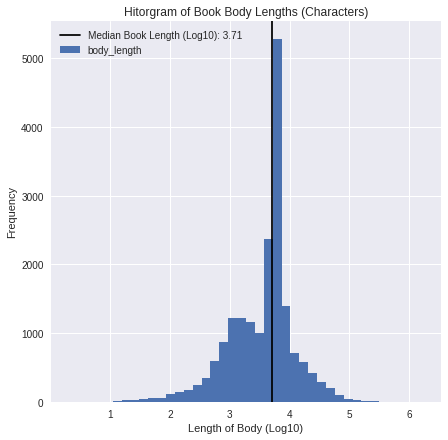

In [5]:
df_fr["body_length"] = df_fr.body_text.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_fr["body_length"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Book Length (Log10): {median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Book Body Lengths (Characters)")
ax.set_xlabel("Length of Body (Log10)")
ax.legend()
plt.show()

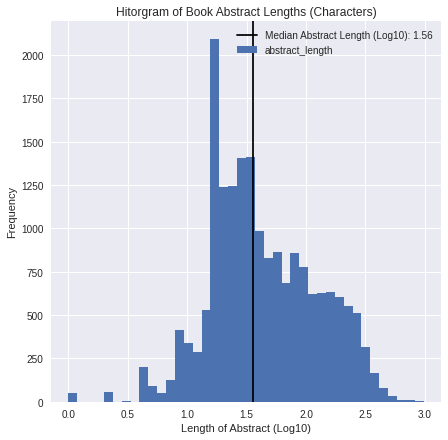

In [6]:
df_fr["abstract_length"] = df_fr.abstract.map(len)

fig, ax = plt.subplots(figsize=(7, 7))
lens_log10 = df_fr["abstract_length"].map(np.log10)
lens_log10.plot.hist(bins=40, ax=ax)

median_len = lens_log10.median()
ax.axvline(median_len, label=f"Median Abstract Length (Log10): {median_len:0.2f}", color="black")

ax.set_title("Hitorgram of Book Abstract Lengths (Characters)")
ax.set_xlabel("Length of Abstract (Log10)")
ax.legend()
plt.show()

From these basic histograms of body and abstract texts, we can see that mosk book texts are rather short, with a median body length of around
5000 characters (10 ^ 3.71). This in turn corresponds to around 1000 words.

## Text Exploration <a id="text-exploration"></a>

Now we take a quick look at one of the book bodies to get a better idea of what we are dealing with.

[Back to top.](#title)

In [7]:
np.random.seed(987)
sample_df = df_fr.sample(6).reset_index(drop=True)
sample_df

,title,url,abstract,body_text,body_html,body_length,abstract_length
0,Wikilivres : Photographie/Personnalités/C/Benj...,https://fr.wikibooks.org/wiki/Photographie/Per...,== Biographie ==,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4...",5368,16
1,Wikilivres : Mathc complexes/Fichiers c : r0 m,https://fr.wikibooks.org/wiki/Mathc_complexes/...,Catégorie:Mathc complexes (livre),Installer et compiler ces fichiers dans votre ...,"<div class=""mw-parser-output""><p><br>\n</p><p>...",1055,33
2,Wikilivres : Livre de cuisine/Taboulé exotique...,https://fr.wikibooks.org/wiki/Livre_de_cuisine...,Le taboulé exotique aux oranges et aux pruneau...,La cuisine sur WikibooksApprendre à cuisiner •...,"<div class=""mw-parser-output""><div style=""back...",1138,77
3,Wikilivres : Programmation Python/Programmer e...,https://fr.wikibooks.org/wiki/Programmation_Py...,1. Ouvrir Python (command line).,Programmation Python\n\n\nPartie 1 - Introduct...,"<div class=""mw-parser-output""><p><br>\n</p>\n<...",3187,32
4,Wikilivres : Photographie/Personnalités/M/J. M...,https://fr.wikibooks.org/wiki/Photographie/Per...,J. Marchand était un photographe professionnel...,PHOTOGRAPHIE\nUn wikilivre pour ceux qui veule...,"<div class=""mw-parser-output""><table border=""4...",4502,78
5,Wikilivres : Programmation Ruby/Syntaxe,https://fr.wikibooks.org/wiki/Programmation_Ru...,= Syntaxe du langage =,Programmation Ruby\n\n\nIntroduction et instal...,"<div class=""mw-parser-output""><p><br>\n</p>\n<...",13805,22


In [8]:
print(sample_df.loc[1, "body_text"])

Installer et compiler ces fichiers dans votre répertoire de travail.





rdiag.c '

/* ------------------------------------ */
/*  Save as :   rdiag.c                */
/* ------------------------------------ */
#include "w_a.h"
/* ------------------------------------ */
void fun(int rc)
{
double **A   = rdiag_mZ(i_mZ(rc,rc),9);

  clrscrn();

  printf(" rdiag_mZ() :  \n\n" 
         " A[R%d,C%d] : \n",rsize_mZ(A),csize_mZ(A));
         
  p_mZ(A, 5,0, 4,0, C6);
   
  f_mZ(A);
}
/* ------------------------------------ */
int main(void)
{
time_t t;

  srand(time(&t));
  
  do
        fun(rp_I(RC8));

  while(stop_w());       

  return 0;
}


Ici nous travaillons avec la fonction rdiag_mZ(). 
Cette fonction nous permet d'obtenir des matrices diagonales.

Exemple de sortie écran :

  
 rdiag_mZ() :  

 A[R4,C4] : 

   -7  -3i    +0  +0i    +0  +0i    +0  +0i 
   +0  +0i    +2  +2i    +0  +0i    +0  +0i 
   +0  +0i    +0  +0i    +6  -9i    +0  +0i 
   +0  +0i    +0  +0i    +0  +0i    -3 

In [9]:
print(sample_df.loc[2, "body_text"])

La cuisine sur WikibooksApprendre à cuisiner • Régime et gastronomie • Toutes les recettes de cuisine

Le taboulé exotique aux oranges et aux pruneaux est un plat d’accompagnement.

Ingrédients[modifier | modifier le wikicode]
300 g de tomates
200 g de semoule de blé
100 g de poivrons
100 g d’oignons
60 cl de bouillon de légumes
50 g de pruneaux dénoyautés
3 cl de bouillon de basilic
3 cl d’huile d’olive
1 orange
1 botte de menthe
Préparation[modifier | modifier le wikicode]
Porter à ébullition les bouillons et retirer du feu, y verser le zeste haché d’un quart d’orange pour infusion
Tailler en dés les poivrons, la tomate, l’oignon et la moitié d’orange épluchée
Verser le bouillon tiède sur la semoule dans un saladier avec la moitié de la menthe hachée, les pruneaux en morceaux et les légumes. S’assurer que la semoule reste ferme mais pas craquante.
Rafraîchir au réfrigérateur.
Au moment de servir, ajouter l’huile d’olive, le reste de la menthe et le jus d’une demi orange. Vérifier l’a

From this first look we can see that there is a great variety of books within the dataset: from recipes to programming texts, with perhaps
a predominance of the latter. This might prove challenging, since code uses mostly english keywords and as such might not be a good sample
of the language. We could look for ways to filter out these texts, or just see if the model can perform well even if we include them. We might 
also have to deal with the diacritics present.

[Back to top.](#title)